# Part 1: Binning degree distributions

## A. Binning real numbers

### Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with $\mu=2$ and $σ=0.125$.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [38]:
mu, sigma, N = 2, 0.125, 5000 # mean, standard deviation and number of points
s = np.random.normal(mu, sigma, N)

We can verify that the Gaussian distribution is done correctly by printing the mean and standard deviation:

In [39]:
print("Mean: " + str(np.mean(s)))
print("Standard deviation: " + str(np.std(s)))

Mean: 1.9994503069185317
Standard deviation: 0.12417032947568692


We see very close values, so the distribution was successful.

### Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?


In [40]:
hist,bin_edges=np.histogram(s,bins=10) #data binned into 10 bins

print(hist)
print(bin_edges)
print('')
print('The count-array has a lenght of: ',len(hist))
print('The bin-array has a lenght of:',len(bin_edges))

[   2   10   97  434 1307 1615 1061  388   79    7]
[1.43406077 1.53837015 1.64267954 1.74698893 1.85129831 1.9556077
 2.05991708 2.16422647 2.26853586 2.37284524 2.47715463]

The count-array has a lenght of:  10
The bin-array has a lenght of: 11


We see from the resulting lists, that there is an additional edge compared to the number of bins. 

### Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

Below, the binned data is plotted in a histogram. The last edge is removed as a result of the bins being defined in intervals as we discovered above.

We make sure to use .bar instead of .hist since the data has already been binned.

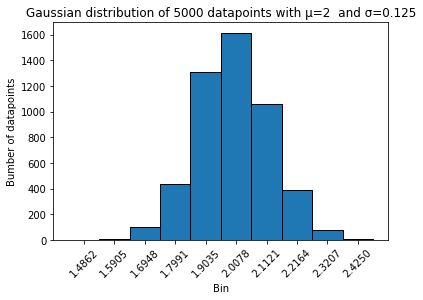

In [41]:
fig, ax = plt.subplots()

ax.bar(x=bin_edges[:-1], height=hist, width=np.diff(bin_edges), align='edge', ec='black')
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Bin')
plt.ylabel('Bumber of datapoints')
plt.title('Gaussian distribution of 5000 datapoints with μ=2  and σ=0.125')

plt.show()

## B. Binning integers

### Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. 

### Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by . 

### Find the maximum and minimum value of your 5000 random numbers.


In [42]:
x = np.random.poisson(10, 5000)
max_value = np.max(x)
print(max_value)
min_value = np.min(x)
print(min_value)

25
2


### Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector  that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number.

### 1. You may want to think about how numpy.histogram deals with the smallest and largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of  to be the highest value observed?

### 2. Use the vector by setting numpy.histogram's bin parameter as bin $=v$. What is the sum over bin counts? 


### 3. Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [43]:
v = np.arange(min(x),max(x)+2)

#Plot of the Poisson distribution
count,bins=np.histogram(x, bins=v)

print(sum(count))

5000


1. The binning-vector's first value is defined as the minimum value of the Poisson distribution. However this is not the case for the maximum value, because as we already discovered, np.histogram returns an additional edge. 

2. The sum of bin counts gives us the length of the dataset, 5000. 

3. The first element in the binning-vector correstonds to the minimum value of the Poisson distribution. The last element should be 1 + the maximum of the poisson distribution, again because of the np.histogram specification.

### Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution

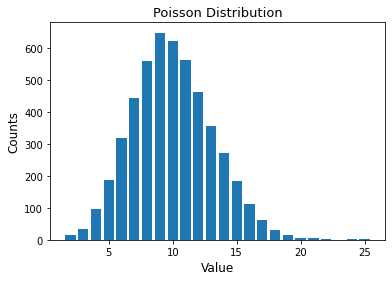

In [44]:
#Plot of the Poisson distribution using matplotlib.pyplot.bar function
plt.bar(bins[:-1], count)
plt.title('Poisson Distribution',fontsize=13)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show() 

## C. Binning and plotting degree distributions.

### Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 

### First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000 , but how do you find p? Hint: The parameter  in the Poisson distribution corresponds to the average degree, so you have to find a p that results in an average degree, k=10. And you know that $<k> = p(N-1)$ , which will give you $p$.

In [45]:
N=5000
k=10
p=k/(N-1)
print(p)

0.002000400080016003


### Now, use networkx to create the graph and extract the degree distribution.

In [46]:
r = nx.random_graphs.erdos_renyi_graph(N,p)

In [47]:
import collections
degree_sequence = sorted([d for n, d in r.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print('Degree distribution',cnt)

Degree distribution (5, 13, 23, 41, 69, 110, 192, 231, 371, 486, 582, 643, 643, 586, 408, 313, 167, 75, 27, 12, 1, 2)


### Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

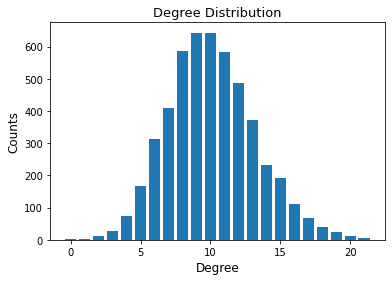

In [48]:
plt.bar(deg, cnt, width=0.80)
plt.title('Degree Distribution',fontsize=13)
plt.xlabel('Degree',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show() 

We see that the plottet degree distribution is very similar to the Poisson distribution plotted above.

# Part 2: Random networks and plotting in networkx

## A: Exercise 3.1: Erdős-Rényi Networks

### Consider an Erdős-Rényi network with $N = 3,000$ nodes, connected to each other with probability $p = 10^{–3}$.

### What is the expected number of links, $〈L〉$?

In [49]:
N = 3000
p = 10**(-3)

L = p*((N*(N-1))/2)

print(L)

4498.5


### In which regime is the network?


There are three different regimes:

1. Subcritical Regime: When k is between 0 and 1 (0<k<1)
2. Supercritical Regime: When k is larger than 1 (k>1)
3. Connected Regime: When k is larger than lnN (k>lnN)

So we need to determine $‹k› = p(N-1)$:

In [50]:
k = p*(N-1)

print(k)

2.999


This means that the average degree of the network is 3. 

With help from WolframAlpha, $lnN$ was calculated to be 8.

This means that $1 ‹ k ‹ lnN$, and hence the network is in the **supercritical regime**.

### Calculate the probability $p_c$ so that the network is at the critical point


The probability is defined as $p_c = \frac{1}{N-1}$, where the critical point, when k = 1, corresponds to the numerator. Hence the probability is found as:

In [51]:
pc = 1/(N-1)

print(pc)

0.00033344448149383126


### Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.


When a network only has one component, it means that there is one giant component, that has absorbed all nodes. This happens in the connected regime, where $p = \frac{ln N}{N}$.

With help from WolframAlpha, the number of nodes is calculated to be $N_{cr} = 9120$

### For the network in (d), calculate the average degree $‹k^{cr}›$ and the average distance between two randomly chosen nodes 〈d〉.


The average degree of the network with $p = 10^{–3}$ and $N_{cr}=9120$ is found:

In [52]:
Ncr = 9120
pcr = 10**-3

kcr = pcr*(Ncr-1)
print(kcr)

9.119


And the average distance between two randomly chosen nodes is defined as $‹d› = \frac{ln(N)}{ln(‹k›)}$, and is found below:

In [53]:
from numpy import log as ln
import numpy as np

d = np.log(Ncr)/np.log(kcr)
print(d)

4.12522144293705


We see that the average distance, $‹d› = 4.125$, while the average degree is $‹k› = 9.119$. This is larger compared to the network in the supercritical regime, which had an average degree of $‹k› = 3$. This makes sense, as the number of nodes is significantly higher and also because for a giant component, all nodes in the network are connected.

### Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The Poisson approximation of the degree distribution is defined as $p_k = \frac{e^{-‹k›}}{\sqrt{2\pi k}}(\frac{e^{‹k›}}{k})^k$.

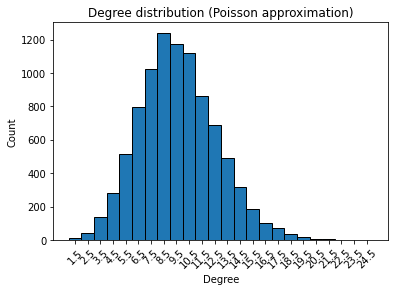

In [54]:
lamb = kcr
N = Ncr

s = np.random.poisson(lamb, N)
v = np.arange(min(s),max(s)+2)

hist,bin_edges=np.histogram(s, v) #data binned into 10 bins

fig, ax = plt.subplots()
ax.bar(x=bin_edges[:-1], height=hist, width=np.diff(bin_edges), align='edge', ec='black')
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution (Poisson approximation)')

plt.show()

## B: Paths

### Plot a random network with 200 nodes and an average degree of 1.5.

We know that there needs to be 200 nodes.
We also know, that the average degree is defined as $‹k› = \frac{2L}{N}$. From this we can isolate L as $L=\frac{‹k›N}{2}$.

In [55]:
N = 200
k = 1.5

L = (k*N/2)
print(L)

150.0


So the total number of links in the network is 150.

Now the network can be plotted using NetworkX:

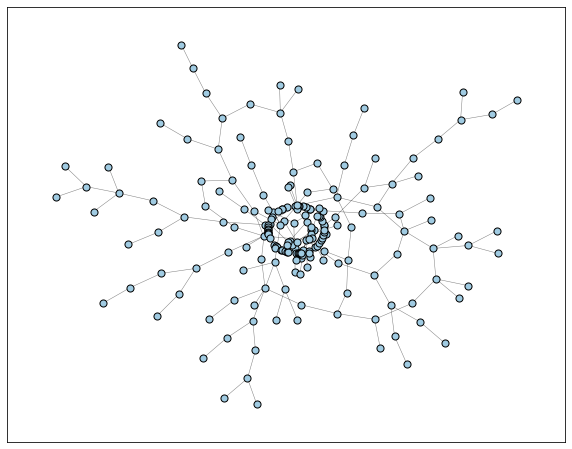

In [56]:
import networkx as nx

Gr = nx.gnm_random_graph(200, 150)

plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(Gr)
node_options = {"node_color": "#A0CBE2", "node_size": 50}
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

nx.draw_networkx_nodes(Gr, pos, **node_options, edgecolors='black')
nx.draw_networkx_edges(Gr, pos, **edge_options)
plt.show()


### Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

A giant connected component (GCC) is a large cluster of nodes in the network. The number of nodes and edges is found below. 

In [57]:
G0 = sorted(nx.connected_components(Gr), key=len, reverse=True) 
Gcc = Gr.subgraph(G0[0]) 

print(Gcc)

Graph with 118 nodes and 128 edges


### Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [58]:
import random

sample = random.sample(Gcc.nodes, len(Gcc))
rn = random.choice(sample)

print(rn)

36


### Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

In [59]:
sp = nx.single_source_shortest_path_length(Gcc, rn)

l2 = []
for node in sp:
    if sp[node] == 2:
        l2.append(node)
        
print(l2)

[128, 129, 3, 196, 38, 43, 13, 118, 54]


### Plot the GCC

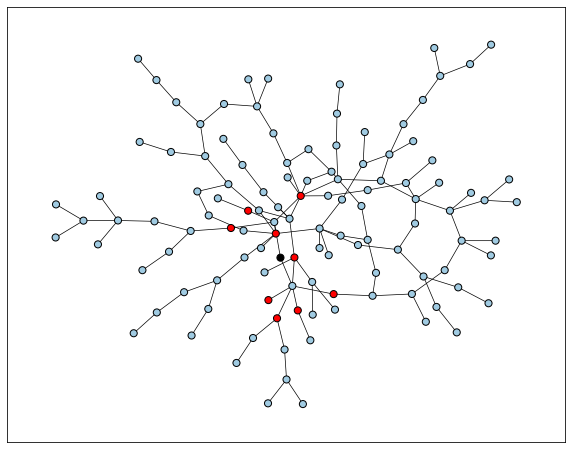

In [60]:
color_map = []

for node in Gcc:
    if node == rn:
        color_map.append('#000000')
    elif node in l2:
        color_map.append('#ff0000')
    else:
        color_map.append('#A0CBE2')


#nx.draw(Gcc, node_color = color_map, node_size = 75)

plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(Gcc)
node_options = {"node_color": color_map, "node_size": 50}
edge_options = {"width": .7, "alpha": 1, "edge_color": "black"}

nx.draw_networkx_nodes(Gcc, pos, **node_options, edgecolors='black')
nx.draw_networkx_edges(Gcc, pos, **edge_options)
plt.show()

# Part 3: Watts-Strogatz Networks

## A.

### Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, 1$. Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when $p=1$.

First, the three networks are defined.

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

graph1 = nx.watts_strogatz_graph(500, 4, 0)
graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph3 = nx.watts_strogatz_graph(500, 4, 1)


The average shortest paths are found. The average shortest path length is the sum of path lengths between all pairs of nodes.

In [62]:
print(nx.average_shortest_path_length(graph1))
print(nx.average_shortest_path_length(graph2))
print(nx.average_shortest_path_length(graph3))

62.875751503006015
8.024841683366734
4.753971943887776


We notice from the result, that as the probability for rewiring, $p$, increases, the average shortest path decreases, while it increases when $p$ gets close to 0. When $p=1$, all links get rewired, and the network turns into a random network, leading to shorter average paths. 


## B.

### Let's investigate this behavior in detail. 

### Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. 

### Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

We start by defining a function that calculates the average of ⟨d⟩ over 50 networks, depending on the value of p.





In [63]:
import numpy as np

def Average(p):
    networks = []
    sp = []
    
    for i in range(50): # Defining the 50 networks  
        graph = nx.watts_strogatz_graph(500, 4, p)
        networks.append(graph)
   
    for j in range(len(networks)): # Finding the shortest path for each of the networks
        short = nx.average_shortest_path_length(networks[j])
        sp.append(short)

    avg = sum(sp)/len(sp)
    stad = np.std(sp)
    
    return avg, stad #, len(networks)

We then want to find the average for all p-values.

In [64]:
p6 = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avglist = []
stdlist = []

for p in p6:
    avglist.append(Average(p)[0])
    stdlist.append(Average(p)[1])

print(avglist)
print(stdlist)

[62.87575150300606, 23.341620681362734, 12.839332264529055, 10.24481987975952, 7.711700681362726, 6.141080721442889]
[7.105427357601002e-15, 4.794210705805784, 0.9970790663128722, 0.678017282454061, 0.29244193643611877, 0.11553072427974731]


Lastly, the dependence between the probabilities and the average path length is plotted:

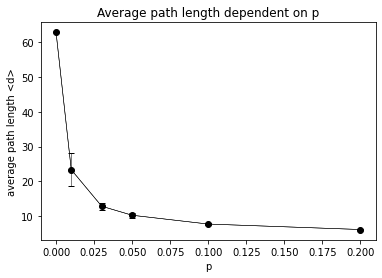

In [65]:
plt.plot(p6, avglist, 'ko-', linewidth=.5)
plt.errorbar(p6, avglist,
             yerr = stdlist,
             fmt ='k', 
             linewidth=.5,
             capsize=3)
plt.xlabel('p')
plt.ylabel('average path length <d>')
plt.title('Average path length dependent on p')
plt.show()

The plot shows a decrease in the average path length with an increase in probability, $p$.

# Part 4: The Barabasi-Albert Model 

## A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

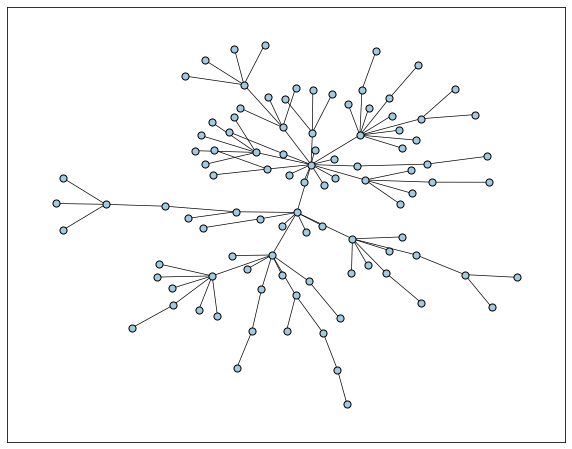

In [68]:
import random

G = nx.Graph()
G.add_edge(1,2)

for i in range(3, 101):
    edges = list(G.edges)
    flatten = [item for sublist in edges for item in sublist]
    node = random.choice(flatten)
    G.add_edge(node, i)

plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)
node_options = {"node_color": '#A0CBE2', "node_size": 50}
edge_options = {"width": .7, "alpha": 1, "edge_color": "black"}

nx.draw_networkx_nodes(G, pos, **node_options, edgecolors='black')
nx.draw_networkx_edges(G, pos, **edge_options)
plt.show()

## B. Now create a 5000 node network.

In [69]:
import random

for i in range(102, 5001):
    edges = list(G.edges)
    flatten = [item for sublist in edges for item in sublist]
    node = random.choice(flatten)
    G.add_edge(node, i)


### What's the maximum and minimum degree?

In [70]:
todict = dict(G.degree()) # Converting to dict in order to be able to extract the degrees from the different nodes.
degs = list(todict.values()) # Extracting the degrees

maxdeg = max(degs)
mindeg = min(degs)

print("Max Degree is: ", maxdeg,"Min Degree is: ", mindeg)

Max Degree is:  93 Min Degree is:  1


### Now, bin the degree distribution, for example using numpy.histogram.

In [71]:
bins = np.arange(maxdeg)

hist, bins = np.histogram(G, bins, density=True)

def degree_distribution(G):
    todict = dict(G.degree()) # Converting to dict in order to be able to extract the degrees from the different nodes.
    degs = list(todict.values()) # Extracting the degrees

    maxdeg = max(degs)
    mindeg = min(degs)
    
    kvalues= np.arange(0,maxdeg+1) # possible values of k
    count = np.zeros(maxdeg+1) # P(k)
    for k in degs:
        count[k] = count[k] + 1
    count = count/sum(count) # the sum of the elements of count(Pk) must to be equal to one
    return kvalues,count

ks, count = degree_distribution(G)

### Plot the distribution. Plot it with both linear and log-log axes.

Text(0.5, 1.0, 'Degree distribution (log-log)')

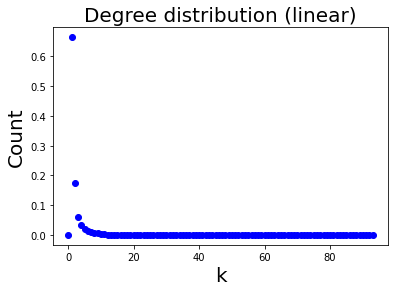

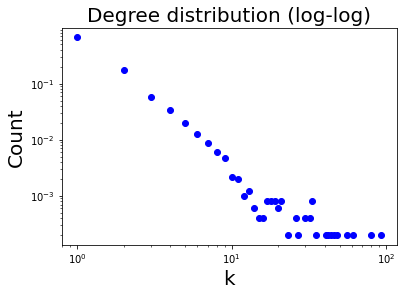

In [72]:
plt.figure()
plt.plot(ks,count,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Degree distribution (linear)", fontsize=20)

plt.figure()
plt.loglog(ks,count,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Degree distribution (log-log)", fontsize=20)

# Part 5: Power-laws and the friendship paradox 

Next step is to explore the Friendship paradox. This paradox states that almost everyone has fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network F-BA for friendship BA). Do the following:

## A. The friendship paradox in BA networks

### Pick a node  at random (e.g. use random.choice). Find its degree.


In [96]:
import random as rd

samples = rd.sample(G.nodes, len(G))
sample = rd.choice(samples)

#print(sample)

ran = G.degree[sample]
print('Degree of sample: ' + str(ran))

Degree of sample: 2


### Find 's neighbors. And calculate their average degree.


First the neghbours are found:

In [97]:
sp = nx.single_source_shortest_path_length(G, sample)

l2 = []
for node in sp:
    if sp[node] == 1:
        l2.append(node)
        
print(l2)

[2273, 1795]


And then their average degree:

In [98]:
degs1 = []

for node in l2:
    degs1.append(G.degree[node])
    
res1 = sum(degs1)/len(degs1)
print(res1)

3.5


### Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.


In [99]:
compare = []

print('Average degree of neighbours: ' + str(res1))
print('Degree of random node: ' + str(ran))

if res1 > ran:
    compare.append("True")
else: 
    compare.append("False")

print('The friendship paradox is ' + str(compare))

Average degree of neighbours: 3.5
Degree of random node: 2
The friendship paradox is ['True']


### Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [100]:
for x in range(999):
    sample = rd.sample(G.nodes, 1)
    sample = sample[0]
    ran = G.degree[sample]

    sp = nx.single_source_shortest_path_length(G, sample)
    l2 = []
    for node in sp:
        if sp[node] == 1:
            l2.append(node)

    degs1 = []
    for node in l2:
        degs1.append(G.degree[node])   
    res1 = sum(degs1)/len(degs1)
        
    if res1 > ran:
        compare.append("True")
    else: 
        compare.append("False")

final = (compare.count("True")/1000)*100

print("The answer is correct " + str(final) + "% of the time")

The answer is correct 87.6% of the time


## B. The friendship paradox more generally

### Will the fraction of times the paradox is true be higher or lower if the power law is flatter with a value of $γ=1.5$?

We know from the book *Network Science by Albert-László Barabási* that there are three regimes dependent on the degree exponent, $γ$. The Anomalous Regime is when $(γ≤ 2)$, and in this regime "the number of links connected to the largest hub grows faster than the size of the network" (section 4.7). From this we get that there will be a very high average degree, and hence it is expected that the friendship paradox will hold true in more situations.

### Simulating a new network with $γ=1.5$ and power-law degree distributions by using the configuation model.

In [4]:
import networkx as nx
from networkx import configuration_model
from networkx.utils import powerlaw_sequence

N = 5000 

seq = powerlaw_sequence(N, exponent=1.5, seed=None)
#print(seq)

for i in range(len(seq)):
  seq[i] = round(seq[i])

#print(seq)
seq[0]=seq[0]+1
#print(seq)

G = nx.configuration_model(seq)
G = nx.Graph(G) # Removing parallel links
G.remove_edges_from(nx.selfloop_edges(G)) # Removing self-loops

And now testing how often the friendhip paradox holds true with the new slope.

In [5]:
import random as rd

compare = []

for x in range(999):
    samples = rd.sample(G.nodes, 1)
    sample = rd.choice(samples)
    ran = G.degree[sample]

    sp = nx.single_source_shortest_path_length(G, sample)
    l2 = []
    for node in sp:
        if sp[node] == 1:
            l2.append(node)

    degs1 = []
    for node in l2:
        degs1.append(G.degree[node])   
    res1 = sum(degs1)/len(degs1)
        
    if res1 > ran:
        compare.append("True")
    else: 
        compare.append("False")

final = (compare.count("True")/1000)*100

print("The answer is correct " + str(final) + "% of the time")

The answer is correct 98.8% of the time


### Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

We see from these results that a flatter power law of $γ=1.5$ increases the fraction of times for which the friendship paradox is true, with correct predictions $98.9%$ of the time. This is also what we expected from the theoretical reasoning.

### Now generating a network for the configuration model that has the same slope and number of nodes as the F-BA model.

Again, we know from the book *Network Science by Albert-László Barabási (section 5.5)* that the Barabási-Albert model has a degree exponent of $γ=3$.

This means that we will now generate a network for the configuration model with a slope of 3 and 5000 nodes.

In [8]:
N = 5000

seq = powerlaw_sequence(N, exponent=3, seed=None)
#print(seq)

for i in range(len(seq)):
  seq[i] = round(seq[i])

#print(seq)
seq[0]=seq[0]+1
#print(seq)

G = nx.configuration_model(seq)
G = nx.Graph(G) # Removing parallel links
G.remove_edges_from(nx.selfloop_edges(G)) # Removing self-loops



### The fraction of times that the friendship paradox holds true is found

In [9]:
compare = []

for x in range(999):
    samples = rd.sample(G.nodes, 1)
    sample = rd.choice(samples)
    ran = G.degree[sample]

    sp = nx.single_source_shortest_path_length(G, sample)
    l2 = []
    for node in sp:
        if sp[node] == 1:
            l2.append(node)

    degs1 = []
    for node in l2:
        degs1.append(G.degree[node])   
    res1 = sum(degs1)/len(degs1)
        
    if res1 > ran:
        compare.append("True")
    else: 
        compare.append("False")

final = (compare.count("True")/1000)*100

print("The answer is correct " + str(final) + "% of the time")

The answer is correct 62.6% of the time


We see that the friendship paradox holds true in significantly fewer cases.

### Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true?

Now we have seen, how networks with a scale-free property are much more prone to follow the friendship paradox.
Other network properties also have an impact on this, as networks with identical degree distributions still show different structures in the resulting networks as stated in *Network Science
by Albert-László Barabási (section 7.2)*. 

An example of this is assortivity, where the hubs in a network tend to connect to each other, rather than to nodes of low degree.

Another example is the community structure, which results from connected subgraphs in a network, where nodes have a much lower probability of being linked to other nodes outside of the community.

### How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? 

A comparison of the distribution of nodes for the two networks could be a way to represent how the friendship paradox varies.

# Part 6: Growth without Preferential Attachment

### Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follow the steps below for success.

### Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability. Let's call this the Sune-network.



In [10]:
#Function to grow graph without using preferential attachment to size n
def grow_without_pa(Graph,n):
    for i in range(n-len(Graph.nodes)):
        node = len(Graph.nodes)+1
        Graph.add_node(node)
        Graph.add_edge(node,np.random.choice(list(Graph.nodes)))
    return Graph

In [12]:
import numpy as np

N = 5000
Sune = nx.Graph()
Sune.add_nodes_from([1,2])
Sune.add_edge(1,2)
Sune = grow_without_pa(Sune,N)


### Generate an ER network of same size and same  as the Sune-network.

In [13]:
p = (N-1)/((N*(N-1))/2)
ER = nx.erdos_renyi_graph(N,p)

### What are the differences between the ER network and the Sune-network? Explain in your own words.
### Hints: To get started, plot the two degree distribution in the same plot. Compare and contrast.

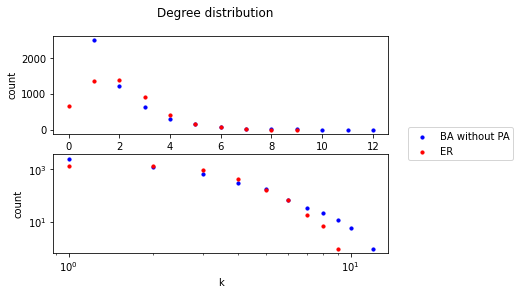

In [15]:
import matplotlib.pyplot as plt

deg_list_Sune = np.array(list(d for n, d in Sune.degree()))
deg_max_Sune = np.max(deg_list_Sune)
deg_min_Sune = np.min(deg_list_Sune)

deg_dist_Sune = np.histogram(deg_list_Sune,bins=np.arange(deg_min_Sune,deg_max_Sune+2))

deg_list_ER = np.array(list(d for n, d in ER.degree()))
deg_max_ER = np.max(deg_list_ER)
deg_min_ER = np.min(deg_list_ER)

deg_dist_ER = np.histogram(deg_list_ER,bins=np.arange(deg_min_ER,deg_max_ER+2))


size = 10
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(deg_dist_Sune[1][:-1],deg_dist_Sune[0],s=size,c="Blue")
ax1.scatter(deg_dist_ER[1][:-1],deg_dist_ER[0],s=size,c="Red")
ax1.set_ylabel('count')

ax2 = fig.add_subplot(212)
ax2.scatter(deg_dist_Sune[1][:-1],deg_dist_Sune[0],s=size,c="Blue")
ax2.scatter(deg_dist_ER[1][:-1],deg_dist_ER[0],s=size,c="Red")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('count')
ax2.set_xlabel('k')

fig.legend(["BA without PA","ER"],bbox_to_anchor=(.70, 0., .5, .6))
fig.suptitle("Degree distribution")

fig.show()

First of all, we see that the ER model follows a Poisson degree distribution. 

Further, a difference between the ER network and the BA network without preferential attachment, is that all nodes in the BA network has at least one link, as a link is created when a node is "grown". This is in oppose to the ER network, which has nodes with no links as we see on the plot. 

We also see that the maximum degree of the BA network is larger than for the ER.The degree distribution of both networks follow roughly the same distribution after degree 1 but diverges again around degree 10.


### Another revealing network property to study is the the number of connected components.

In [16]:
nx.number_connected_components(ER)

815

In [17]:
nx.number_connected_components(Sune)

7

From this we see that the ER network has a significantly higher number of connected components compare to the Sune network. This is because of the growth of the BA network.